# Assignment 12 - Neural Networks image recognition
Use both MLNN and the ConvNet to solve the following problem.

1. Add random noise (i.e. `np.random.normal`) to the images in training and testing. Make sure each image gets a different noise feature added to it. Inspect by printing out an image. 
2. Compare the loss/accuracy (train, val) after N epochs for both MLNN and ConvNet with and without noise. 
3. Vary the amount of noise (multiply `np.random.normal` by a factor) and keep track of the accuracy and loss (for training and validation) and plot these results.

# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [2]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [3]:
#define noise
huge_gaussian_noise_train = np.random.normal(0,1, x_train.shape)
huge_gaussian_noise_test = np.random.normal(0,1, x_test.shape)

In [4]:
#generate new x_train and x_test with noise
NOISY = 0.15 #constant
x_train_noise = huge_gaussian_noise_train * NOISY + x_train 
x_train_noise_2 = huge_gaussian_noise_train * (NOISY*2) + x_train

In [5]:
#generate new x_train and x_test with facator 2 noise
NOISY = 0.3 #constant
x_test_noise = huge_gaussian_noise_test * NOISY + x_test 
x_test_noise_2 = huge_gaussian_noise_test * (NOISY*2) + x_test

In [6]:
#clean model

batch_size = 128
num_classes = 10
epochs = 20

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 277us/step - loss: 0.244

In [7]:
#noise model

batch_size = 128
num_classes = 10
epochs = 20

# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

model_noise = Sequential()
model_noise.add(Dense(512, activation='relu', input_shape=(784,)))
model_noise.add(Dropout(0.2))
model_noise.add(Dense(512, activation='relu'))
model_noise.add(Dropout(0.2))
model_noise.add(Dense(10, activation='softmax'))

model_noise.summary()

model_noise.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_noise = model_noise.fit(x_train_noise, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_noise, y_test))

score_noise = model_noise.evaluate(x_test_noise, y_test, verbose=0)
print('Test loss:', score_noise[0])
print('Test accuracy:', score_noise[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 258us/step - loss: 0.285

In [8]:
#noise factor 2 model

batch_size = 128
num_classes = 10
epochs = 20

# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

model_noise_2 = Sequential()
model_noise_2.add(Dense(512, activation='relu', input_shape=(784,)))
model_noise_2.add(Dropout(0.2))
model_noise_2.add(Dense(512, activation='relu'))
model_noise_2.add(Dropout(0.2))
model_noise_2.add(Dense(10, activation='softmax'))

model_noise_2.summary()

model_noise_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_noise_2 = model_noise_2.fit(x_train_noise_2, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_noise_2, y_test))

score_noise_2 = model_noise_2.evaluate(x_test_noise_2, y_test, verbose=0)
print('Test loss:', score_noise_2[0])
print('Test accuracy:', score_noise_2[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 328us/step - loss: 0.382

# MLNN Figures:

Test loss: 0.09972424096881491
Test accuracy: 0.984


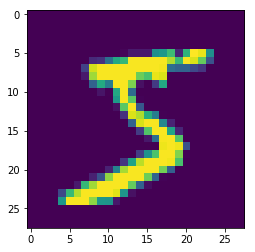

In [9]:
#clean
x_train = x_train.reshape(60000,28,28)#reshaped data for image call
plt.imshow(x_train[0])

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5431661400104764
Test accuracy: 0.9418


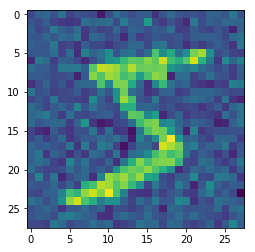

In [10]:
#noise
x_train_noise = x_train_noise.reshape(60000,28,28)#reshaped data for image call
plt.imshow(x_train_noise[0])

print('Test loss:', score_noise[0])
print('Test accuracy:', score_noise[1])

Test loss: 1.635016804915093
Test accuracy: 0.8481


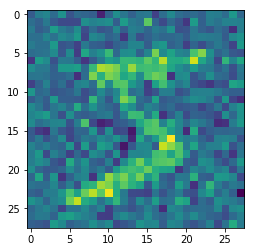

In [11]:
#noise factor 2
x_train_noise_2 = x_train_noise_2.reshape(60000,28,28)#reshaped data for image call
plt.imshow(x_train_noise_2[0])

print('Test loss:', score_noise_2[0])
print('Test accuracy:', score_noise_2[1])

([<matplotlib.axis.XTick at 0x251dacfb0f0>,
 <a list of 3 Text xticklabel objects>)

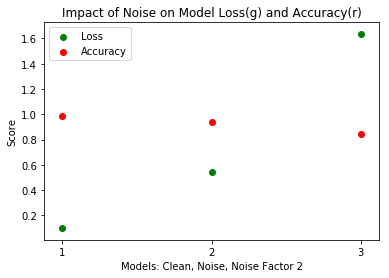

In [12]:
#figure comparing noise impact on loss and accuracy scores
x = [1,2,3]
y_test_loss_scores = [score[0], score_noise[0], score_noise_2[0]]
y_test_accuracy_scores = [score[1], score_noise[1], score_noise_2[1]]

plt.scatter(x,y_test_loss_scores, c='g', label='Loss')
plt.scatter(x,y_test_accuracy_scores, c='r', label='Accuracy')
plt.title('Impact of Noise on Model Loss(g) and Accuracy(r)')
plt.xlabel('Models: Clean, Noise, Noise Factor 2')
plt.ylabel('Score')
plt.legend()
plt.xticks(np.arange(min(x), max(x)+1))

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [13]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [14]:
#define noise
huge_gaussian_noise_train = np.random.normal(0,1, x_train.shape)
huge_gaussian_noise_test = np.random.normal(0,1, x_test.shape)

In [15]:
#generate new x_train and x_test with noise
NOISY = 0.15 #constant
x_train_noise = huge_gaussian_noise_train * NOISY + x_train 
x_train_noise_2 = huge_gaussian_noise_train * (NOISY*2) + x_train

In [16]:
#generate new x_train and x_test with facator 2 noise
NOISY = 0.3 #constant
x_test_noise = huge_gaussian_noise_test * NOISY + x_test 
x_test_noise_2 = huge_gaussian_noise_test * (NOISY*2) + x_test

# Conv Net Models:

In [17]:
#clean

batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 199s 3ms/step - loss: 0.2850 - acc: 0.9117 - val_loss: 0.0598 - val_acc: 0.9803
Epoch 2/12
60000/60000 [==============================] - 292s 5ms/step - loss: 0.0951 - acc: 0.9716 - val_loss: 0.0418 - val_acc: 0.9867
Epoch 3/12
60000/60000 [==============================] - 316s 5ms/step - loss: 0.0694 - acc: 0.9798 - val_loss: 0.0369 - val_acc: 0.9869
Epoch 4/12
60000/60000 [==============================] - 288s 5ms/step - loss: 0.0580 - acc: 0.9828 - val_loss: 0.0300 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 268s 4ms/step - loss: 0.0491 - acc: 0.9852 - val_loss: 0.0320 - val_acc: 0.9892
Epoch 6/12
60000/60000 [==============================] - 316s 5ms/step - loss: 0.0433 - acc: 0.9870 - val_loss: 0.0296 - val_acc: 0.9903
Epoch 7/12
60000/60000 [==============================] - 260s 4ms/step - loss: 0.0401 - acc: 0.9880 - val_loss: 0.0258 - 

In [18]:
#noise

batch_size = 128
num_classes = 10
epochs = 12

model_noise = Sequential()
model_noise.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_noise.add(Conv2D(64, (3, 3), activation='relu'))
model_noise.add(MaxPooling2D(pool_size=(2, 2)))
model_noise.add(Dropout(0.25))
model_noise.add(Flatten())
model_noise.add(Dense(128, activation='relu'))
model_noise.add(Dropout(0.5))
model_noise.add(Dense(num_classes, activation='softmax'))

model_noise.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model_noise.fit(x_train_noise, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_noise, y_test))
score_noise = model_noise.evaluate(x_test_noise, y_test, verbose=0)
print('Test loss:', score_noise[0])
print('Test accuracy:', score_noise[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 188s 3ms/step - loss: 0.2808 - acc: 0.9133 - val_loss: 0.0868 - val_acc: 0.9722
Epoch 2/12
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0968 - acc: 0.9703 - val_loss: 0.0655 - val_acc: 0.9787
Epoch 3/12
60000/60000 [==============================] - 257s 4ms/step - loss: 0.0714 - acc: 0.9789 - val_loss: 0.0624 - val_acc: 0.9795
Epoch 4/12
60000/60000 [==============================] - 257s 4ms/step - loss: 0.0605 - acc: 0.9809 - val_loss: 0.0586 - val_acc: 0.9796
Epoch 5/12
60000/60000 [==============================] - 292s 5ms/step - loss: 0.0529 - acc: 0.9837 - val_loss: 0.0538 - val_acc: 0.9829
Epoch 6/12
60000/60000 [==============================] - 280s 5ms/step - loss: 0.0458 - acc: 0.9855 - val_loss: 0.0620 - val_acc: 0.9809
Epoch 7/12
60000/60000 [==============================] - 273s 5ms/step - loss: 0.0436 - acc: 0.9869 - val_loss: 0.0616 - 

In [19]:
#noise factor 2

batch_size = 128
num_classes = 10
epochs = 12

model_noise_2 = Sequential()
model_noise_2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_noise_2.add(Conv2D(64, (3, 3), activation='relu'))
model_noise_2.add(MaxPooling2D(pool_size=(2, 2)))
model_noise_2.add(Dropout(0.25))
model_noise_2.add(Flatten())
model_noise_2.add(Dense(128, activation='relu'))
model_noise_2.add(Dropout(0.5))
model_noise_2.add(Dense(num_classes, activation='softmax'))

model_noise_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model_noise_2.fit(x_train_noise_2, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_noise_2, y_test))
score_noise_2 = model.evaluate(x_test_noise_2, y_test, verbose=0)
print('Test loss:', score_noise_2[0])
print('Test accuracy:', score_noise_2[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.3573 - acc: 0.8880 - val_loss: 0.1948 - val_acc: 0.9353
Epoch 2/12
60000/60000 [==============================] - 198s 3ms/step - loss: 0.1255 - acc: 0.9625 - val_loss: 0.2004 - val_acc: 0.9344
Epoch 3/12
60000/60000 [==============================] - 219s 4ms/step - loss: 0.0945 - acc: 0.9714 - val_loss: 0.1875 - val_acc: 0.9380
Epoch 4/12
60000/60000 [==============================] - 175s 3ms/step - loss: 0.0779 - acc: 0.9764 - val_loss: 0.2230 - val_acc: 0.9264
Epoch 5/12
60000/60000 [==============================] - 206s 3ms/step - loss: 0.0664 - acc: 0.9796 - val_loss: 0.2153 - val_acc: 0.9284
Epoch 6/12
60000/60000 [==============================] - 219s 4ms/step - loss: 0.0608 - acc: 0.9815 - val_loss: 0.2378 - val_acc: 0.9204
Epoch 7/12
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0553 - acc: 0.9831 - val_loss: 0.1978 - 

# Conv Net Figures:

Test loss: 0.027517108637413638
Test accuracy: 0.9918


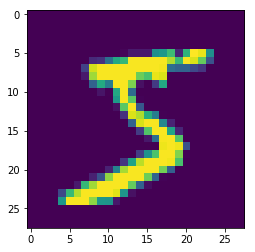

In [20]:
#clean
x_train = x_train.reshape(60000,28,28)#reshaped data for image call
plt.imshow(x_train[0])

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06648664653106826
Test accuracy: 0.9811


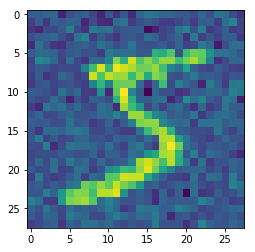

In [21]:
#noise
x_train_noise = x_train_noise.reshape(60000,28,28)#reshaped data for image call
plt.imshow(x_train_noise[0])

print('Test loss:', score_noise[0])
print('Test accuracy:', score_noise[1])

Test loss: 3.0350480186462403
Test accuracy: 0.4806


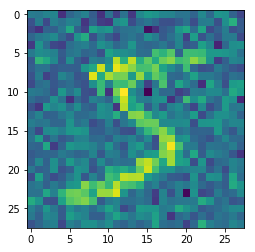

In [22]:
#noise factor 2
x_train_noise_2 = x_train_noise_2.reshape(60000,28,28)#reshaped data for image call
plt.imshow(x_train_noise_2[0])

print('Test loss:', score_noise_2[0])
print('Test accuracy:', score_noise_2[1])

([<matplotlib.axis.XTick at 0x251cf5125f8>,
 <a list of 3 Text xticklabel objects>)

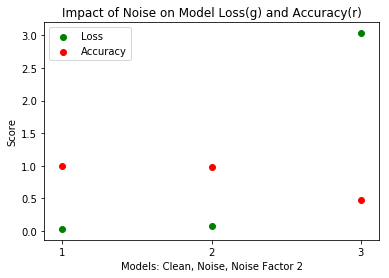

In [23]:
#figure comparing noise impact on loss and accuracy scores
x = [1,2,3]
y_test_loss_scores = [score[0], score_noise[0], score_noise_2[0]]
y_test_accuracy_scores = [score[1], score_noise[1], score_noise_2[1]]

plt.scatter(x,y_test_loss_scores, c='g', label='Loss')
plt.scatter(x,y_test_accuracy_scores, c='r', label='Accuracy')
plt.title('Impact of Noise on Model Loss(g) and Accuracy(r)')
plt.xlabel('Models: Clean, Noise, Noise Factor 2')
plt.ylabel('Score')
plt.legend()
plt.xticks(np.arange(min(x), max(x)+1))